In [26]:
from __future__ import annotations
from rich import print
from rich.pretty import pprint
from rich.columns import Columns
from tqdm.notebook import tqdm
from custom_counter import CustomCounter as Counter, init_byte_counter, ConsumableCounter
from collections import defaultdict, ChainMap, deque
from collections.abc import Iterable, Callable, Hashable, Generator,\
    ItemsView, KeysView, ValuesView, MappingView,\
    Mapping, MutableMapping,\
    Sequence, MutableSequence
from bitarray import bitarray, frozenbitarray
from bitarray.util import ba2int, int2ba, huffman_code, zeros, intervals
from sortedcontainers import SortedSet
from typing import List, Set, Dict, Tuple, Optional, Union, Iterable
from dataclasses import dataclass, field
from operator import attrgetter
from copy import deepcopy, copy
#from delta_of_delta import delta_encode, delta_decode, delta_of_delta_encode, delta_of_delta_decode
from lolviz import objviz, lolviz, listviz, treeviz
from cycle_gen import CMWC
import math
import xxhash
import functools
from itertools import chain
from more_itertools import split_at, mark_ends, stagger, bucket, windowed, pairwise
from enum import Enum, IntEnum
# https://realpython.com/lru-cache-python/
from functools import lru_cache

from _1_byte_hash_cell import init_xor_paths, has_prev_byte, has_next_byte, has_all_next_bytes, get_prev_bytes, get_next_bytes,\
    has_next_byte_id, get_next_byte_by_id, get_prev_byte_id, get_next_byte_id,\
    has_common_seed_for_head_seed_pointer, has_common_seed_for_tail_seed_pointer, has_common_seed_for_expansion_byte_pointer,\
    get_seeds_for_head_seed_pointer, get_seeds_for_tail_seed_pointer, get_seeds_for_expansion_byte_pointer,\
    resolve_data_pointer, resolve_head_seed_pointer, resolve_tail_seed_pointer, resolve_expansion_byte_pointer,\
    get_seeds_for_data_pointer

In [27]:
DEFAULT_ENDIAN = 'big'
file_name = './data/AMillionRandomDigits.bin'
#file_name = f"./data/image-144kb.jpg"
data = bitarray(endian=DEFAULT_ENDIAN)
file = open(file=file_name, mode='rb')
data.fromfile(file)

#data        = frozenbitarray(data) # first n bits

data_length = len(data)
_data_bits  = data[0:8*256]
_data_bytes = list()
for _byte_id in range(0, 256):
    _start_bit       = _byte_id * 8
    _end_bit         = _start_bit + 8
    _data_byte_value = _data_bits[_start_bit:_end_bit]
    _data_bytes.append(ba2int(_data_byte_value))
pprint(_data_bytes[0:16])

_nibble_bytes = list()
_nibble_bits  = list()
for _byte_id in range(0, 256):
    _start_bit       = _byte_id * 4
    _end_bit         = _start_bit + 4
    _nibble_value = data[_start_bit:_end_bit]
    _nibble_bytes.append(ba2int(_nibble_value))
    _nibble_bits.append(_nibble_value)
print(_nibble_bytes[0:16])
print(_nibble_bits[0:16])

[27, 155, 63, 8, 127, 81, 85, 159, 232, 16, 203, 137, 74, 8, 74, 4]

[1, 11, 9, 11, 3, 15, 0, 8, 7, 15, 5, 1, 5, 5, 9, 15]

[
    bitarray('0001'),
    bitarray('1011'),
    bitarray('1001'),
    bitarray('1011'),
    bitarray('0011'),
    bitarray('1111'),
    bitarray('0000'),
    bitarray('1000'),
    bitarray('0111'),
    bitarray('1111'),
    bitarray('0101'),
    bitarray('0001'),
    bitarray('0101'),
    bitarray('0101'),
    bitarray('1001'),
    bitarray('1111')
]

In [30]:
#print(f"{list(windowed(_nibble_bytes[0:16], n=2, step=2))}")

[(1, 11), (9, 11), (3, 15), (0, 8), (7, 15), (5, 1), (5, 5), (9, 15)]

level=0

1  11          9  11          3  15          0   8          7  15          5   1         5   5         9  15

10              2             12              8              8              4             0             6

level=1

10   2                        12   8                         8   4                         0   6

8                             4                            12                             6

level=2

8   4                                                        12   6

12                                                            10

level=3

12  10

6

In [101]:
# https://www.geeksforgeeks.org/create-a-sequence-whose-xor-of-elements-is-y/
# Python3 implementation of the approach
# This code is contributed by AnkitRai01
 
# Function to find and print
# the required sequence
def find_sequence(length: int, target_value: int) :
    sequence = list()
    # pw1 = (1 << 17)
    # pw2 = (1 << 18)
    # seriously, NO IDEA WHAT THOSE NUMBERS ARE DOING
    pw1 = (1 << 6)
    pw2 = (1 << 7)
 
    # Base case
    if (length == 1) :
        sequence.append(target_value)
        #print(x)
    # Not allowed case
    elif (length == 2 and target_value == 0):
        print("-1: No sequence for you! :)")
        return None
         
    elif (length == 2) :
        sequence.append(target_value)
        sequence.append(0)
        #print(x, " ", "0")
    else :
        ans = 0
        # XOR of first N - 3 elements
        for i in range(1, length - 2):
            sequence.append(i)
            #print(i, end = " ")
            ans = ans ^ i
        # Case 1: Add three integers whose XOR is 0
        if (ans == target_value):
            sequence.append(pw1 + pw2)
            sequence.append(pw1)
            sequence.append(pw2)
            #print(pw1 + pw2, " ", pw1, " ", pw2)
        # Case 2: Add three integers
        # whose XOR is equal to ans
        else:
            sequence.append(pw1)
            sequence.append((pw1 ^ target_value) ^ ans)
            sequence.append(0)
            #print(pw1, " ", ((pw1 ^ x) ^ ans), " 0 ")
        return sequence

# Python 3 Program to find the number
# whose XOR sum with given array is
# equal to a given number k
 
# This function returns the number to
# be inserted in the given array
def find_value_to_insert(current_bytes: List[int], target_value: int) -> int:
    list_length = len(current_bytes)
    # initialise the answer with k
    ans = target_value
    for i in range(list_length):
        ans = ans ^ current_bytes[i]
    return ans
    #return ans[len(ans)]
 

current_bytes = [1, 2, 3, 4, 5]

for _byte_value in _data_bytes[0:8]:
    new_value = find_value_to_insert(current_bytes=current_bytes, target_value=_byte_value)
    current_bytes.append(new_value)
    current_bytes.sort()
    #current_bytes = list(SortedSet(current_bytes))
    _xor_res  = 0
    for _x in current_bytes:
        _xor_res = _xor_res ^ _x
    print(f"{_byte_value:3}: current_bytes={current_bytes}, new_value={new_value}, res={_xor_res}")
 

27: current_bytes=[1, 2, 3, 4, 5, 26], new_value=26, res=27

155: current_bytes=[1, 2, 3, 4, 5, 26, 128], new_value=128, res=155

63: current_bytes=[1, 2, 3, 4, 5, 26, 128, 164], new_value=164, res=63

8: current_bytes=[1, 2, 3, 4, 5, 26, 55, 128, 164], new_value=55, res=8

127: current_bytes=[1, 2, 3, 4, 5, 26, 55, 119, 128, 164], new_value=119, res=127

81: current_bytes=[1, 2, 3, 4, 5, 26, 46, 55, 119, 128, 164], new_value=46, res=81

85: current_bytes=[1, 2, 3, 4, 4, 5, 26, 46, 55, 119, 128, 164], new_value=4, res=85

159: current_bytes=[1, 2, 3, 4, 4, 5, 26, 46, 55, 119, 128, 164, 202], new_value=202, res=159

In [106]:
pair_columns = list()
#prev_pairs   = list(windowed(_nibble_bytes[0:16], n=2, step=2))
prev_pairs   = _nibble_bytes[0:32]
for _level in range(0, 8):
    if (len(prev_pairs) == 1):
        break
    xor_pairs = list()
    xor_items = list()
    pairs     = list(windowed(prev_pairs, n=2, step=2))
    for pair in pairs:
        xor_pair = pair[0] ^ pair[1]
        xor_pairs.append(xor_pair)
        xor_items.append({xor_pair: (pair[0], pair[1])})
    seq_target       = xor_pairs[0] #prev_pairs[0] #xor_pairs[0]
    #last_item_target = prev_pairs[1]
    seq              = list(range(0, 15-_level))
    new_item         = find_value_to_insert(current_bytes=seq, target_value=seq_target)
    #last_seq_item_counts = Counter()
    #for seq_length in range(3, 32-_level):
    #    seq           = find_sequence(length=seq_length, target_value=seq_target)
    #    length_nibble = seq_length % 16
    #    last_seq_item = seq[len(seq)-2]
    #    last_seq_xor  = (last_seq_item // 16) ^ length_nibble
    #    last_seq_item_counts.update({ last_seq_item: 1 })
    #    if (last_seq_xor == last_item_target):
    #        break
    
    #print(f"{last_seq_item_counts.aggregated_counts()}")
    pair_cols = Columns([f"{_p[0]:2}  {_p[1]:2}" for _p in pairs], equal=True, expand=True)
    print(pair_cols)
    xor_cols = Columns([f"  {_xp:2}  " for _xp in xor_pairs], equal=True, expand=True)
    print(xor_cols)
    print(f"level={_level}, seq={seq}, l={len(seq)}, seq_target={seq_target}, new_item={new_item}") # pairs={pairs}, xor_pairs={xor_pairs}
    #print(f"level={_level}, seq={seq} (l={len(seq)}, last={last_seq_xor}), seq_t={seq_target}, li_t={last_item_target}") # pairs={pairs}, xor_pairs={xor_pairs}
    #print(Columns(xor_pairs, equal=True, expand=True))
    prev_pairs = xor_pairs.copy()

1  11   9  11   3  15   0   8   7  15  5   1  5   5  9  15 14   8  1   0 12  11  8   9  4  10  0   8  4  10  0   4

10       2      12       8       8      4      0      6      6      1      7      1     14      8     14      4

level=0, seq=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], l=15, seq_target=10, new_item=5

10   2         12   8          8   4          0   6          6   1          7   1        14   8        14   4

8              4             12              6              7              6             6            10

level=1, seq=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], l=14, seq_target=8, new_item=9

8   4                        12   6                         7   6                         6  10

12                            10                             1                            12

level=2, seq=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], l=13, seq_target=12, new_item=0

12  10                                                         1  12

6                                                            13

level=3, seq=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], l=12, seq_target=6, new_item=6

6  13

11

level=4, seq=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], l=11, seq_target=11, new_item=0

In [5]:
# https://www.geeksforgeeks.org/check-if-the-array-has-an-element-which-is-equal-to-xor-of-remaining-elements/
# This code is contributed by Mohit Kumar
 
# Function that returns true if the array
# contains an element which is equal to
# the XOR of the remaining elements
def containsElement(arr, n):
    # To store the XOR of all
    # the array elements
    xorArr = 0
    for i in range(n):
        xorArr ^= arr[i]
    # For every element of the array
    for i in range(n):
        # Take the XOR after excluding
        # the current element
        x = xorArr ^ arr[i]
        # If the XOR of the remaining elements
        # is equal to the current element
        if (arr[i] == x):
            return True
    # If no such element is found
    return False
 
# Driver Code
arr = [8, 2, 4, 15, 1]
node = len(arr)
 
if (containsElement(arr, node)):
    print("Yes")
else:
    print("No")

Yes

In [6]:
# https://www.geeksforgeeks.org/find-elements-of-array-using-xor-of-consecutive-elements/
# This code is contributed by Mohit Kumar
# Python3 program to find the array 
# elements using xor of consecutive elements
 
# Function to find the array elements
# using XOR of consecutive elements
 
def getElements(a, arr, n):
    # array to store the original elements
    elements = [1 for i in range(n + 1)]
    # first elements a i.e elements[0]=a
    elements[0] = a
    for i in range(n):
        # To get the next elements we have to 
        # calculate xor of previous elements 
        # with given xor of 2 consecutive elements.
        # e.g. if a^b=k1 so to get b xor a both side.
        # b = k1^a 
        elements[i + 1] = arr[i] ^ elements[i]
             
    # original array elements
    return elements
 
# Driver code
arr = [13, 2, 6, 1]
node = len(arr)
a = 5
_elements = getElements(a, arr, node)
print(f"_elements={_elements} ({len(_elements)})")

_elements=[5, 8, 10, 12, 13] (5)

In [7]:
# Recursive Python program for level
# order traversal of Binary Tree


# A node structure
class Node:
    # A utility function to create a new node
    def __init__(self, key):
        self.data = key
        self.left = None
        self.right = None


# Function to  print level order traversal of tree
def printLevelOrder(root):
    h = height(root)
    for i in range(1, h+1):
        printCurrentLevel(root, i)


# Print nodes at a current level
def printCurrentLevel(root, level):
    if root is None:
        return
    if level == 1:
        print(root.data, end=" ")
    elif level > 1:
        printCurrentLevel(root.left, level-1)
        printCurrentLevel(root.right, level-1)


# Compute the height of a tree--the number of nodes
# along the longest path from the root node down to
# the farthest leaf node
def height(node):
    if node is None:
        return 0
    else:

        # Compute the height of each subtree
        l_height = height(node.left)
        r_height = height(node.right)

        # Use the larger one
        if l_height > r_height:
            return l_height+1
        else:
            return r_height+1


# Driver program to test above function
if __name__ == '__main__':
    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(4)
    root.left.right = Node(5)

    print("Level order traversal of binary tree is -")
    printLevelOrder(root)

# Python program to print level
# order traversal using Queue

# A node structure
class Node:
    # A utility function to create a new node
    def __init__(self, key):
        self.data  = key
        self.left  = None
        self.right = None


# Iterative Method to print the
# height of a binary tree
def printLevelOrder(root):
    # Base Case
    if root is None:
        return
    # Create an empty queue
    # for level order traversal
    queue = []
    # Enqueue Root and initialize height
    queue.append(root)

    while(len(queue) > 0):
        # Print front of queue and
        # remove it from queue
        print(queue[0].data, end=" ")
        node = queue.pop(0)
        # Enqueue left child
        if node.left is not None:
            queue.append(node.left)
        # Enqueue right child
        if node.right is not None:
            queue.append(node.right)


# Driver Program to test above function
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)

print("Level Order Traversal of binary tree is -")
printLevelOrder(root)


# This code is contributed by Nikhil Kumar Singh(nickzuck_007)

Level order traversal of binary tree is -

1

2

3

4

5

Level Order Traversal of binary tree is -

1

2

3

4

5

In [8]:
# https://www.geeksforgeeks.org/iterative-preorder-traversal/
# Python3 program to implement Morris preorder traversal
 
# A binary tree node
 
class Node:
    def __init__(self, item):
        self.data = item
        self.left = self.right = None
 
class BinaryTree:
    def __init__(self):
        self.root = None
 
    def morris_traversal_preorder(self):
        self.morris_traversal_preorder_helper(self.root)
 
    # Preorder traversal without recursion and without stack
    def morris_traversal_preorder_helper(self, node):
        while node:
            # If left child is None, print the current 
            # node data. Move to the right child.
            if node.left is None:
                print(node.data, end=" ")
                node = node.right
            else:
                # Find inorder predecessor
                current = node.left
                while current.right is not None and current.right is not node:
                    current = current.right
 
                # If the right child of the inorder 
                # predecessor already points to this node
                if current.right is node:
                    current.right = None
                    node = node.right
                else:
                    # If the right child doesn't point to this node, 
                    # then print this node
                    # and make the right child point to this node
                    print(node.data, end=" ")
                    current.right = node
                    node = node.left
 
    def preorder(self):
        self.preorder_helper(self.root)
 
    # Function for standard preorder traversal
    def preorder_helper(self, node):
        if node is not None:
            print(node.data, end=" ")
            self.preorder_helper(node.left)
            self.preorder_helper(node.right)
 
# Driver program to test the above functions
tree = BinaryTree()
tree.root = Node(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)
tree.root.right.left = Node(6)
tree.root.right.right = Node(7)
tree.root.left.left.left = Node(8)
tree.root.left.left.right = Node(9)
tree.root.left.right.left = Node(10)
tree.root.left.right.right = Node(11)
 
tree.morris_traversal_preorder()
print("")
tree.preorder()


1

2

4

8

9

5

10

11

3

6

7

1

2

4

8

9

5

10

11

3

6

7

In [9]:
# https://www.geeksforgeeks.org/tree-traversals-inorder-preorder-and-postorder/

# A function to do preorder tree traversal
def printPreorder(root):
    if root:
        # First print the data of node
        print(root.val, end=" "),
        # Then recur on left child
        printPreorder(root.left)
        # Finally recur on right child
        printPreorder(root.right)

# A function to do postorder tree traversal
def printPostorder(root):
    if root:
        # First recur on left child
        printPostorder(root.left)
        # The recur on right child
        printPostorder(root.right)
        # Now print the data of node
        print(root.val, end=" ")

# Iterative Method to print the
# height of a binary tree
def printLevelOrder(root):
    # Base Case
    if root is None:
        return
    # Create an empty queue
    # for level order traversal
    queue = []
    # Enqueue Root and initialize height
    queue.append(root)
    
    while(len(queue) > 0):
        # Print front of queue and
        # remove it from queue
        print(queue[0].data, end=" ")
        node = queue.pop(0)
        # Enqueue left child
        if node.left is not None:
            queue.append(node.left)
        # Enqueue right child
        if node.right is not None:
            queue.append(node.right)

In [10]:
# https://www.geeksforgeeks.org/left-child-right-sibling-representation-tree/
# this code is contributed by shinjanpatra

# Python program to find k-th child of a given
# Node using typical representation that uses
# an array of pointers.
 
# A Node to represent left child / right sibling representation.
class Node:
    def __init__(self, P):
        self.val   = P
        self.child = None
        self.next  = None
 
# Traverses given n-ary tree to find K-th child of P
def printKthChild(root: Node, P, k):
    if (root == None):
        return 
    
    # If P is present at root itself
    if (root.val == P):
        # Traverse children of root starting from left child
        t = root.child
        i = 1
        while (t != None and i < k):
            t = t.next
            i += 1
     
        if (t == None):
            #raise Exception(f"Error : {k}-th child of P={P} does not exist")
            print(f"Error: {k}-th child of P={P} does not exist")
            return None
        return t.val
    if (root.child):
        return printKthChild(root.child, P, k)
    return printKthChild(root.next, P, k)
 
# Driver code
root = Node('A')
root.child = Node('B')
root.child.next = Node('C')
root.child.next.next = Node('D')
root.child.next.next.next = Node('E')
root.child.child = Node('F')
root.child.child.next = Node('G')
root.child.next.next.child = Node('H')
root.child.next.next.child.child = Node('L')
root.child.next.next.child.child.next = Node('M')
root.child.child.child = Node('I')
root.child.child.child.next = Node('J')
root.child.child.child.next.next = Node('K')
 
# Print F's 2nd child
P = 'F'
print(f"F's second child is : {printKthChild(root, P, 2)}")
 
P = 'A'
print(f"A's seventh child is : {printKthChild(root, P, 7)}")

F's second child is : J

Error: 7-th child of P=A does not exist

A's seventh child is : None

[10, 2, 3, 4, 6, 5, 7, 8, 9]

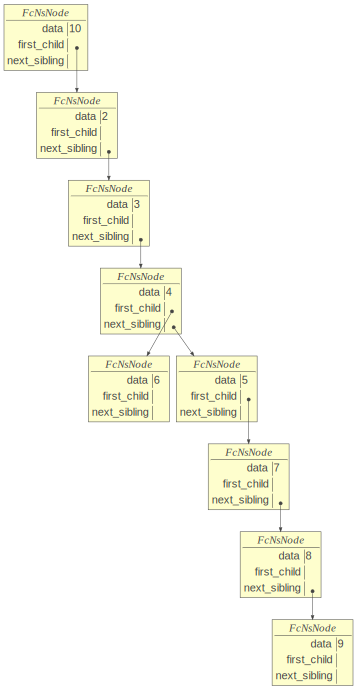

In [11]:
# https://www.geeksforgeeks.org/generic-treesn-array-trees/
# https://www.geeksforgeeks.org/creating-tree-left-child-right-sibling-representation/
# This code is contributed by pranchalK

# Python3 program to create a tree with 
# first child next sibling representation. 
 
@dataclass()
class FcNsNode:
    """
    First child / next sibling representation
    In the first child / next sibling representation, the steps taken are: 
    1) At each node-link the children of the same parent(siblings) from left to right.
    2) Remove the links from parent to all children except the first child.

    Since we have a link between children, we do not need extra links from parents to all the children. 
    This representation allows us to traverse all the elements by starting at the first child of the parent.
    """
    data         : int             = field()
    first_child  : FcNsNode | None = field(default=None)
    next_sibling : FcNsNode | None = field(default=None)

    def __init__(self, data, first_child: FcNsNode | None = None, next_sibling: FcNsNode | None = None):
        self.data         = data
        self.first_child  = first_child
        self.next_sibling = next_sibling
 
# Adds a sibling to a list with
# starting with n 
def add_next_sibling(node: FcNsNode, data) -> FcNsNode | None:
    if (node == None):
        return None
    while (node.next_sibling):
        node = node.next_sibling
    node.next_sibling = FcNsNode(data)
    return node.next_sibling
 
# Add left child Node to a Node 
def add_first_child(node: FcNsNode, data) -> FcNsNode | None:
    if (node == None):
        return None
    # Check if child list is not empty. 
    if (node.first_child): 
        return add_next_sibling(node.first_child, data) 
    node.first_child = FcNsNode(data)
    return node.first_child
 
# Traverses tree in depth first order 
def traverse_fcns_tree(root: FcNsNode) -> List[int]:
    if (root == None):
        return list()
    data_items = list()
    while (root):
        data_items.append(root.data)
        if (root.first_child):
            data_items += traverse_fcns_tree(root.first_child) 
        root = root.next_sibling
    return data_items
 
# Driver code 
    
# Let us create below tree 
#        10 
#     / /   \   \ 
#    2 3     4   5 
#            | / | \ 
#            6 7 8 9 

# Left child right sibling 
# 10 
# | 
# 2 -> 3 -> 4 -> 5 
#           |    | 
#           6    7 -> 8 -> 9 
root = FcNsNode(10) 
n1 = add_first_child(root, 2) 
n2 = add_first_child(root, 3) 
n3 = add_first_child(root, 4) 
n4 = add_first_child(n3, 6) 
n5 = add_first_child(root, 5) 
n6 = add_first_child(n5, 7) 
n7 = add_first_child(n5, 8) 
n8 = add_first_child(n5, 9) 

data_items = list(traverse_fcns_tree(root))
pprint(data_items)
#print(f"data_items={data_items} ({len(data_items)})")

treeviz(root=root)
#treeviz(root=root, leftfield='first_child')
#objviz(root)

In [12]:
# https://www.geeksforgeeks.org/convert-a-generic-treen-array-tree-to-binary-tree/

class TreeNode:
    def __init__(self, val):
        self.val      = val
        self.left     = None
        self.right    = None
        self.children = []
 
def generic_to_binary(root: 'Node') -> TreeNode:
    if not root:
        return None
    # create a binary tree node with the data of the current node
    binary_node = TreeNode(root.val)
    # convert the first child to a binary tree and set as left child of binary_node
    if root.children:
        binary_node.left = generic_to_binary(root.children[0])
    # convert the next sibling to a binary tree and set as right child of binary_node
    current = binary_node.left
    for child in root.children[1:]:
        current.right = generic_to_binary(child)
        current = current.right
    return binary_node
 
def printTree(root):
    if not root:
        return
    print(root.val, end=" ")
    printTree(root.left)
    printTree(root.right)
 
 
root = TreeNode(1)
root.children.append(TreeNode(2))
root.children.append(TreeNode(3))
root.children.append(TreeNode(4))
root.children.append(TreeNode(5))
 
root.children[0].children.append(TreeNode(6))
root.children[0].children.append(TreeNode(7))
 
root.children[3].children.append(TreeNode(8))
root.children[3].children.append(TreeNode(9))
 
binaryTreeRoot = generic_to_binary(root)
 
# Output: 1 2 6 7 3 4 5 8 9 
#printTree(binaryTreeRoot)

In [13]:
# https://www.geeksforgeeks.org/path-from-the-root-node-to-a-given-node-in-an-n-ary-tree/
# # This code is contributed by mohit kumar
from bisect import bisect_left
 
# Function to find the path
# from root to N
def get_path_to_value(target_value: int) -> List[int]:
    # Stores the number of
    # nodes at (i + 1)-th level
    arr = []
    arr.append(1)
    # Stores the number of nodes
    k = 1
    # Stores if the current
    # level is even or odd
    flag = True
    while (k < target_value):
        # If level is odd
        if (flag == True):
            k *= 2
            flag = False
        # If level is even
        else:
            k *= 4
            flag = True
        # If level with
        # node N is reached
        if (k > target_value):
            break
        # Push into vector
        arr.append(k)
    lenn      = len(arr)
    prefix    = [0]*(lenn)
    prefix[0] = 1
    # Compute prefix sums of count
    # of nodes in each level
    for i in range(1,lenn):
        prefix[i] = arr[i] + prefix[i - 1]
    it = bisect_left(prefix, target_value)
    # Stores the level in which
    # node N s present
    ind = it
    temp = target_value
    # Store path
    path = []
    path.append(target_value)
    while (ind > 1):
        val = temp - prefix[ind - 1]
        if (ind % 2 != 0):
            temp = prefix[ind - 2] + (val + 1) // 2
        else:
            temp = prefix[ind - 2] + (val + 3) // 4
        ind -= 1
        # Insert temp into path
        path.append(temp)
    if (target_value != 1):
        path.append(1)
    return path
 
# Driver Code
_path = get_path_to_value(200)
print(f"path={_path} ({len(_path)})")

path=[200, 82, 25, 10, 3, 1] (6)

In [14]:
# https://www.geeksforgeeks.org/given-linked-list-representation-of-complete-tree-convert-it-to-linked-representation/
# This code is contributed by Nikhil Kumar Singh(nickzuck_007)

# Python program to create a Complete Binary Tree from
# its linked list representation
 
# Linked List node
class ListNode:
        # Constructor to create a new node
        def __init__(self, data):
            self.data = data
            self.next = None
 
# Binary Tree Node structure
class BinaryTreeNode:
    # Constructor to create a new node
    def __init__(self, data):
        self.data  = data
        self.left  = None
        self.right = None
 
# Class to convert the linked list to Binary Tree
class Conversion:
    # Constructor for storing head of linked list
    # and root for the Binary Tree
    def __init__(self, data = None):
        self.head = None
        self.root = None
 
    def push(self, new_data):
        # Creating a new linked list node and storing data
        new_node = ListNode(new_data)
        # Make next of new node as head
        new_node.next = self.head
        # Move the head to point to new node
        self.head = new_node
 
    def convertList2Binary(self):
        # Queue to store the parent nodes
        q = []
        # Base Case
        if self.head is None:
            self.root = None
            return
 
        # 1.) The first node is always the root node,
        # and add it to the queue
        self.root = BinaryTreeNode(self.head.data)
        q.append(self.root)
        # Advance the pointer to the next node
        self.head = self.head.next
 
        # Until the end of linked list is reached, do:
        while(self.head):
            # 2.a) Take the parent node from the q and
            # and remove it from q
            parent = q.pop(0) # Front of queue
            
            # 2.c) Take next two nodes from the linked list.
            # We will add them as children of the current
            # parent node in step 2.b.
            # Push them into the queue so that they will be
            # parent to the future node
            leftChild  = None
            rightChild = None
 
            leftChild = BinaryTreeNode(self.head.data)
            q.append(leftChild)
            self.head = self.head.next
            if (self.head):
                rightChild = BinaryTreeNode(self.head.data)
                q.append(rightChild)
                self.head = self.head.next
 
            #2.b) Assign the left and right children of parent
            parent.left  = leftChild
            parent.right = rightChild
 
    def inorderTraversal(self, root):
        items = list()
        if (root):
            items += self.inorderTraversal(root.left)
            #print (root.data)
            items.append(root.data)
            items += self.inorderTraversal(root.right)
        return items
 
# Driver Program to test above function
 
# Object of conversion class
conv = Conversion()
conv.push(36)
conv.push(30)
conv.push(25)
conv.push(15)
conv.push(12)
conv.push(10)
 
conv.convertList2Binary()
 
print ("Inorder Traversal of the constructed Binary Tree is:")
_items = conv.inorderTraversal(conv.root)
print(f"items={_items} ({len(_items)})")

Inorder Traversal of the constructed Binary Tree is:

items=[25, 12, 30, 10, 36, 15] (6)

In [ ]:
# Function to return the required array 
def getArray(n) : 
    ans = []; 
    # Store the power of 2 
    p2 = 1; 
    # while n is greater than 0 
    while (n > 0) :
        # if there is 1 in binary 
        # representation 
        if (n & 1) :
            ans.append(p2); 
        # Divide n by 2 
        # Multiply p2 by 2 
        n >>= 1; 
        p2 *= 2; 
 
    return ans; 
 
bits_counts = Counter()
ll_counts   = Counter()
bits_groups = defaultdict(SortedSet)
ll_groups = defaultdict(SortedSet)

for _byte_value in range(0, 256): #_data_bytes[0:256]:
    # Get the answer 
    _xor_list = getArray(_byte_value)
    _xor_res  = 0
    for _x in _xor_list:
        _xor_res = _xor_res ^ _x
    _ll = len(_xor_list)

    bits_counts.update({ _xor_res: 1 })
    ll_counts.update({ _ll: 1 })
    bits_groups[_xor_res].add(_byte_value)
    ll_groups[_ll].add(_byte_value)
    #if (_ll > 4):
    #    continue
    # Printing the array 
    #print(f"bits={int2ba(_xor_res, length=8, endian=DEFAULT_ENDIAN)}, v={_byte_value}: list={_xor_list} ({len(_xor_list)}), res={_xor_res}")
print(bits_counts.aggregated_counts().first_items())
pprint(ll_counts.most_common())
#pprint(bits_groups)
#pprint(ll_groups)

In [18]:
# Python 3 Program to find the number
# whose XOR sum with given array is
# equal to a given number k
 
# This function returns the number to
# be inserted in the given array
def find_value_to_insert(current_bytes: List[int], target_value: int) -> int:
    list_length = len(current_bytes)
    # initialise the answer with k
    ans = target_value
    for i in range(list_length):
        ans = ans ^ current_bytes[i]
    return ans
    #return ans[len(ans)]
 

current_bytes = [1, 2, 3, 4, 5]

for _byte_value in _data_bytes[0:8]:
    new_value = find_value_to_insert(current_bytes=current_bytes, target_value=_byte_value)
    current_bytes.append(new_value)
    current_bytes.sort()
    #current_bytes = list(SortedSet(current_bytes))
    _xor_res  = 0
    for _x in current_bytes:
        _xor_res = _xor_res ^ _x
    print(f"{_byte_value:3}: current_bytes={current_bytes}, new_value={new_value}, res={_xor_res}")
 

27: current_bytes=[1, 2, 3, 4, 5, 26], new_value=26, res=27

155: current_bytes=[1, 2, 3, 4, 5, 26, 128], new_value=128, res=155

63: current_bytes=[1, 2, 3, 4, 5, 26, 128, 164], new_value=164, res=63

8: current_bytes=[1, 2, 3, 4, 5, 26, 55, 128, 164], new_value=55, res=8

127: current_bytes=[1, 2, 3, 4, 5, 26, 55, 119, 128, 164], new_value=119, res=127

81: current_bytes=[1, 2, 3, 4, 5, 26, 46, 55, 119, 128, 164], new_value=46, res=81

85: current_bytes=[1, 2, 3, 4, 4, 5, 26, 46, 55, 119, 128, 164], new_value=4, res=85

159: current_bytes=[1, 2, 3, 4, 4, 5, 26, 46, 55, 119, 128, 164, 202], new_value=202, res=159

In [17]:
# Function to rearrange the array
# B[] such that A[i] ^ B[i] is same
# for each element
def rearrangeArray(A, B, N):
   
  # Store frequency of elements
  m = {}
 
  # Stores xor value
  xor_value = 0
 
  for i in range(0, N):
     
    # Taking xor of all the
    # values of both arrays
    xor_value ^= A[i]
    xor_value ^= B[i]
 
    # Store frequency of B[]
    if B[i] in m:
      m[B[i]] = m[B[i]] + 1
    else:
      m[B[i]] = 1
     
  for i in range(0, N):
     
    # Find the array B[] after
    # rearrangement
    B[i] = A[i] ^ xor_value
 
    # If the updated value is
    # present then decrement
    # its frequency
    if B[i] in m:
      m[B[i]] = m[B[i]] - 1
       
    # Otherwise return empty vector
    else:
      X = []
      return X
 
  return B
 
# Utility function to rearrange the
# array B[] such that A[i] ^ B[i]
# is same for each element
def rearrangeArrayUtil(A, B, N):
   
  # Store rearranged array B
  ans = rearrangeArray(A, B, N)
   
  # If rearrangement possible
  if (len(ans) > 0):
     for x in ans:
        print(x, end = ' ')
         
  # Otherwise return -1
  else:
    print("-1")
     
# Driver Code
if __name__ == '__main__':
   
  # Given vector A
  A = [ 13, 21, 33, 49, 53 ]
 
  # Given vector B
  B = [ 54, 50, 34, 22, 14 ]
 
  # Size of the vector
  N = len(A)
 
  # Function Call
  rearrangeArrayUtil(A, B, N)

14

22

34

50

54